# K Means
--- 
finds k centroids and points around those centroids form the clusters

In [1]:
# using sklearn==0.18.2 and scipy==1.2.3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

data_set = pd.read_csv('Mall_Customers.csv')

data_set.info()
data_set.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## clustering the customers based on their Annual Income &	Spending Score (1-100)

In [2]:
X = data_set.iloc[:,[3,4]].values

## finding optimal number of clusters

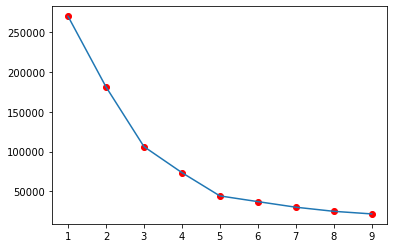

In [8]:
from sklearn.cluster import KMeans
# within cluster sum of squares (wcss) is the sum of distances^2 for each point within clusters from their centroids
# smaller wcss => high performance
wcss = [] 
for k in range(1,10):
    temp_classifier = KMeans(n_clusters= k ,init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    temp_classifier.fit(X)
    wcss.append(temp_classifier.inertia_)
plt.scatter(range(1,10),wcss, color = 'red')  
plt.plot(range(1,10),wcss)

## the elbow forms at k=5;  so 5 is the optimal clusters number

In [13]:
# the centroid initialisation is random by default but it can lead to very bad results; k-means++ is a good initialisation method 
classifier = KMeans(n_clusters= 5 ,init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = classifier.fit_predict(X)
# y_kmeans

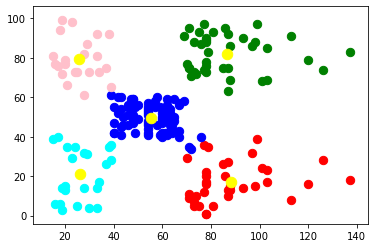

In [14]:
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],s=70,c= 'red',  label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],s=70,c= 'blue',  label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],s=70,c= 'green',  label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1],s=70,c= 'pink',  label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1],s=70,c= 'cyan',  label = 'Cluster 5')
plt.scatter(classifier.cluster_centers_[:,0],classifier.cluster_centers_[:,1],s=110,c= 'Yellow',  label = 'Centroids')